# This is a abstract summary classifier module building project. Overhere we took the data set which contains some textual abstract content related to some passage and we have made a supervised module which can predict the category of the text it belonging to.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [2]:
data=pd.read_csv('D:/Study/ML/Data/bbc-text.csv')

In [3]:
data.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
l=LabelEncoder()

In [5]:
data['Category_Code']=l.fit_transform(data['category'])

In [6]:
data.describe()

,Category_Code
count,2225.000000
mean,1.958202
std,1.428310
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [7]:
data.head()

,category,text,Category_Code
0,tech,tv future in the hands of viewers with home th...,4
1,business,worldcom boss left books alone former worldc...,0
2,sport,tigers wary of farrell gamble leicester say ...,3
3,sport,yeading face newcastle in fa cup premiership s...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1


Text(0, 0.5, 'Category')

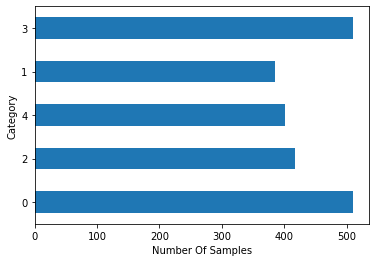

In [8]:
Graph= data['Category_Code'].value_counts(sort=False).plot(kind='barh')
Graph.set_xlabel("Number Of Samples")
Graph.set_ylabel("Category")

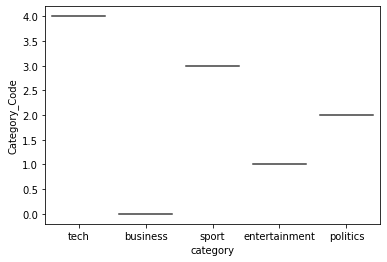

In [27]:
sns.violinplot(x="category", y="Category_Code", data=data)

In [9]:
data['Category_Code'].values

array([4, 0, 3, ..., 1, 2, 3])

In [10]:
X=data['text']

In [11]:
Y=data['Category_Code']

In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=4)

In [13]:
cv = CountVectorizer()

In [14]:
x_traincv=cv.fit_transform(X_train)

In [15]:
a=x_traincv.toarray()

In [16]:
a[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
cv.inverse_transform(a[0])

[array(['2001', '2004', '75', 'according', 'activity', 'after', 'again',
        'also', 'amid', 'and', 'are', 'around', 'as', 'assume', 'at',
        'bank', 'bbc', 'been', 'believed', 'biggest', 'booming',
        'bridgewell', 'but', 'chief', 'committee', 'confidence',
        'consumer', 'cooling', 'dangerous', 'economic', 'economist',
        'economy', 'england', 'evidence', 'fall', 'february', 'fell',
        'first', 'five', 'following', 'going', 'governor', 'growing',
        'growth', 'had', 'half', 'hand', 'has', 'have', 'he', 'hit',
        'hold', 'house', 'housing', 'however', 'in', 'interest', 'is',
        'it', 'jeffrey', 'king', 'last', 'latest', 'leave',
        'manufacturing', 'market', 'meeting', 'mervyn', 'month', 'monthly',
        'mr', 'nationwide', 'not', 'now', 'october', 'of', 'on', 'out',
        'output', 'past', 'patch', 'peaked', 'previous', 'previously',
        'prices', 'programme', 'put', 'quarter', 'radio', 'rapid', 'rate',
        'rates', 'remain

In [18]:
x_testcv=cv.transform(X_test)

In [19]:
mnb = MultinomialNB()

In [20]:
y_train=Y_train.astype('int')

In [21]:
mnb.fit(x_traincv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
predictions=mnb.predict(x_testcv)

In [23]:
predictions

array([2, 3, 3, 3, 1, 3, 3, 4, 3, 2, 3, 4, 3, 3, 4, 1, 2, 2, 4, 1, 0, 0,
       3, 4, 2, 3, 4, 0, 3, 4, 3, 0, 3, 1, 0, 1, 3, 0, 0, 2, 3, 0, 1, 1,
       3, 2, 4, 4, 4, 4, 3, 3, 3, 1, 3, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 3,
       3, 0, 4, 0, 2, 3, 0, 2, 0, 4, 4, 1, 3, 0, 3, 3, 4, 2, 2, 3, 2, 1,
       2, 2, 1, 4, 4, 2, 3, 2, 1, 2, 4, 1, 1, 2, 0, 0, 2, 1, 2, 2, 2, 0,
       3, 1, 3, 2, 4, 3, 0, 2, 3, 3, 3, 4, 1, 0, 0, 0, 0, 1, 4, 3, 2, 1,
       0, 1, 4, 1, 2, 0, 2, 1, 3, 0, 3, 0, 0, 3, 0, 3, 4, 4, 1, 4, 0, 1,
       0, 2, 3, 2, 0, 2, 0, 2, 3, 3, 2, 2, 0, 3, 4, 4, 2, 0, 0, 1, 0, 3,
       4, 4, 3, 4, 2, 2, 1, 1, 3, 0, 1, 3, 0, 0, 1, 2, 0, 2, 3, 2, 0, 3,
       0, 0, 2, 1, 2, 2, 2, 0, 4, 3, 1, 3, 0, 3, 4, 1, 2, 0, 1, 0, 1, 0,
       4, 0, 2, 1, 1, 1, 3, 3, 0, 1, 3, 4, 0, 4, 3, 1, 3, 2, 4, 3, 1, 2,
       4, 3, 3, 1, 2, 1, 1, 0, 3, 1, 4, 2, 4, 2, 1, 4, 1, 4, 0, 1, 0, 4,
       2, 0, 0, 0, 2, 4, 0, 1, 2, 2, 0, 3, 2, 2, 0, 0, 4, 2, 4, 4, 3, 3,
       2, 1, 0, 0, 3, 0, 4, 3, 2, 1, 1, 2, 4, 2, 3,

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
a=accuracy_score(Y_test,predictions)

In [26]:
a

0.9595808383233533